## Predicting cell identity with CellTypist

## import packages

In [1]:
import scanpy as sc
import scipy as io
import pandas as pd

In [2]:
import celltypist
from celltypist import models

In [3]:
import matplotlib.pyplot as plt

In [4]:
sc.set_figure_params(dpi=100)

## import data

In [5]:
adata = sc.read('/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/merged_unprocessed_db_filt_clustered_QCed_reclustered.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 35224 × 28997
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5'

In [7]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5
cell_barcode,,,,,,,,,,,,,,,,
MCO_01373_3GEX_AAACCAAAGTAGACTT-1,MCO_01373_3GEX,1305.0,507,2539.0,1356,0.000000,singlet,0.062500,0.123643,1.545689e-36,Diff_MK_non_competition,9001.0,2467,3,8,8
MCO_01373_3GEX_AAACCAAAGTCATCGA-1,MCO_01373_3GEX,10226.0,4006,10319.0,4006,3.980051,singlet,0.196297,0.359109,8.665537e-03,Diff_MK_non_competition,10296.0,4006,5,2,2


In [8]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw',
       'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class',
       'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score',
       'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2',
       'seurat_clusters', 'SCT_snn_res.0.5'],
      dtype='object')

# import model Alsinet

In [9]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_Alsinet.pkl')

In [10]:
new_model

CellTypist model with 18 cell types and 4199 features
    date: 2025-01-22 16:40:15.475078
    cell types: AdvancedMesoderm, EarlyFibroblasts, ..., iPSCs
    features: SAMD11, NOC2L, ..., MT-CYB

### apply the model to the object

In [11]:
adata.X.min()

0.0

In [12]:
adata.X.max()

7.385851078125209

In [13]:
adata.raw = adata

In [14]:
adata.raw.X.min()

0.0

In [15]:
adata.raw.X.max()

7.385851078125209

In [16]:
adata.X.expm1().sum(axis = 1)

matrix([[ 9001.],
        [10296.],
        [ 8880.],
        ...,
        [17373.],
        [17444.],
        [15311.]])

## Renormalize to log1p

In [17]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

In [18]:
sc.pp.log1p(adata)

In [19]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [20]:
#celltypist.annotate??

In [21]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 35224 cells and 28997 genes
🔗 Matching reference genes in the model
🧬 4097 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [22]:
adata = predictions.to_adata()

In [23]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,
MCO_01373_3GEX_AAACCAAAGTAGACTT-1,MCO_01373_3GEX,1305.0,507,2539.0,1356,0.000000,singlet,0.062500,0.123643,1.545689e-36,Diff_MK_non_competition,9001.0,2467,3,8,8,2588.328561,PrimitiveStreak,0.002239
MCO_01373_3GEX_AAACCAAAGTCATCGA-1,MCO_01373_3GEX,10226.0,4006,10319.0,4006,3.980051,singlet,0.196297,0.359109,8.665537e-03,Diff_MK_non_competition,10296.0,4006,5,2,2,4078.548695,iPSCs,0.986878


### visualize celltypist predictions

In [24]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
Megakaryocytes                 14024
iPSCs                          10398
PrimitiveStreak                 6322
Fibroblasts                     1128
HemogenicEndothelium             997
AdvancedMesoderm                 605
EarlyFibroblasts                 513
EmergentMesoderm                 467
MesoEcto                         385
NeuralCrest                      201
NeutrophilMyeloidProgenitor      133
Mono-DCprec                       41
Endoderm                           6
ErythrocyteLineage                 2
Macrophages                        2
Name: count, dtype: int64

In [25]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
Megakaryocytes                  True
iPSCs                           True
PrimitiveStreak                 True
Fibroblasts                     True
HemogenicEndothelium            True
AdvancedMesoderm                True
EarlyFibroblasts                True
EmergentMesoderm                True
MesoEcto                        True
NeuralCrest                     True
NeutrophilMyeloidProgenitor     True
Mono-DCprec                    False
Endoderm                       False
ErythrocyteLineage             False
Macrophages                    False
Name: count, dtype: bool

In [26]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
Megakaryocytes                  True
iPSCs                           True
PrimitiveStreak                 True
Fibroblasts                     True
HemogenicEndothelium            True
AdvancedMesoderm                True
EarlyFibroblasts                True
EmergentMesoderm                True
MesoEcto                        True
NeuralCrest                     True
NeutrophilMyeloidProgenitor     True
Mono-DCprec                    False
Endoderm                       False
ErythrocyteLineage             False
Macrophages                    False
Name: count, dtype: bool

In [27]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 35173 × 28997
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5', 'n_counts', 'predicted_labels', 'conf_score'
    uns: 'log1p'

In [28]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

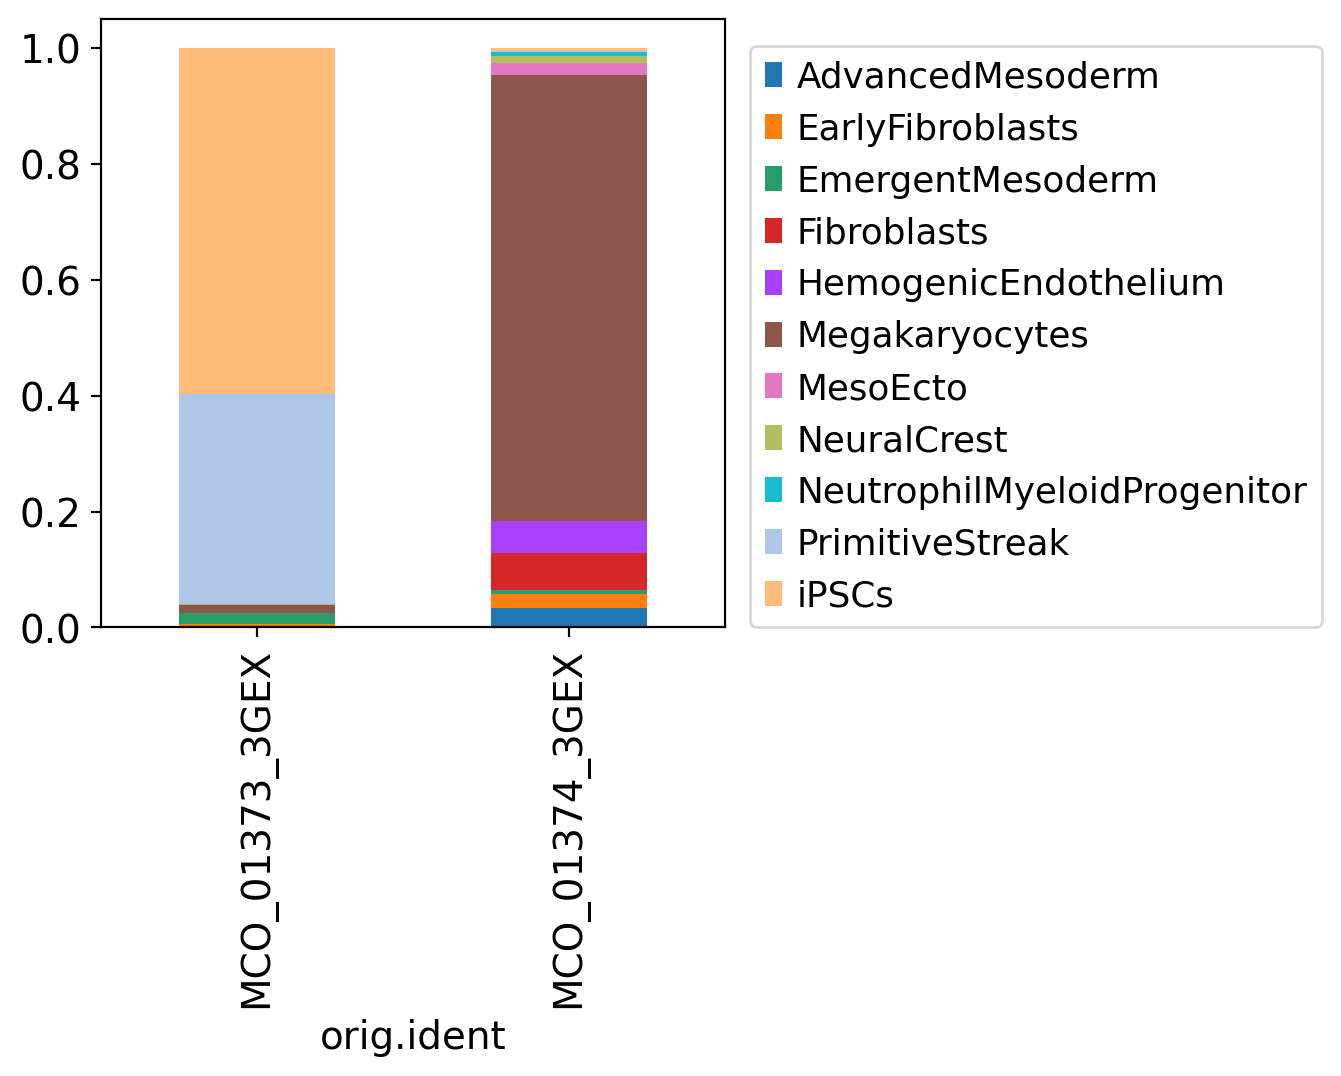

In [29]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [30]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [31]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [32]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [33]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [34]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [35]:
import os
from matplotlib import pyplot as plt


In [36]:
os.chdir("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/graphs/")

### checking confidence score

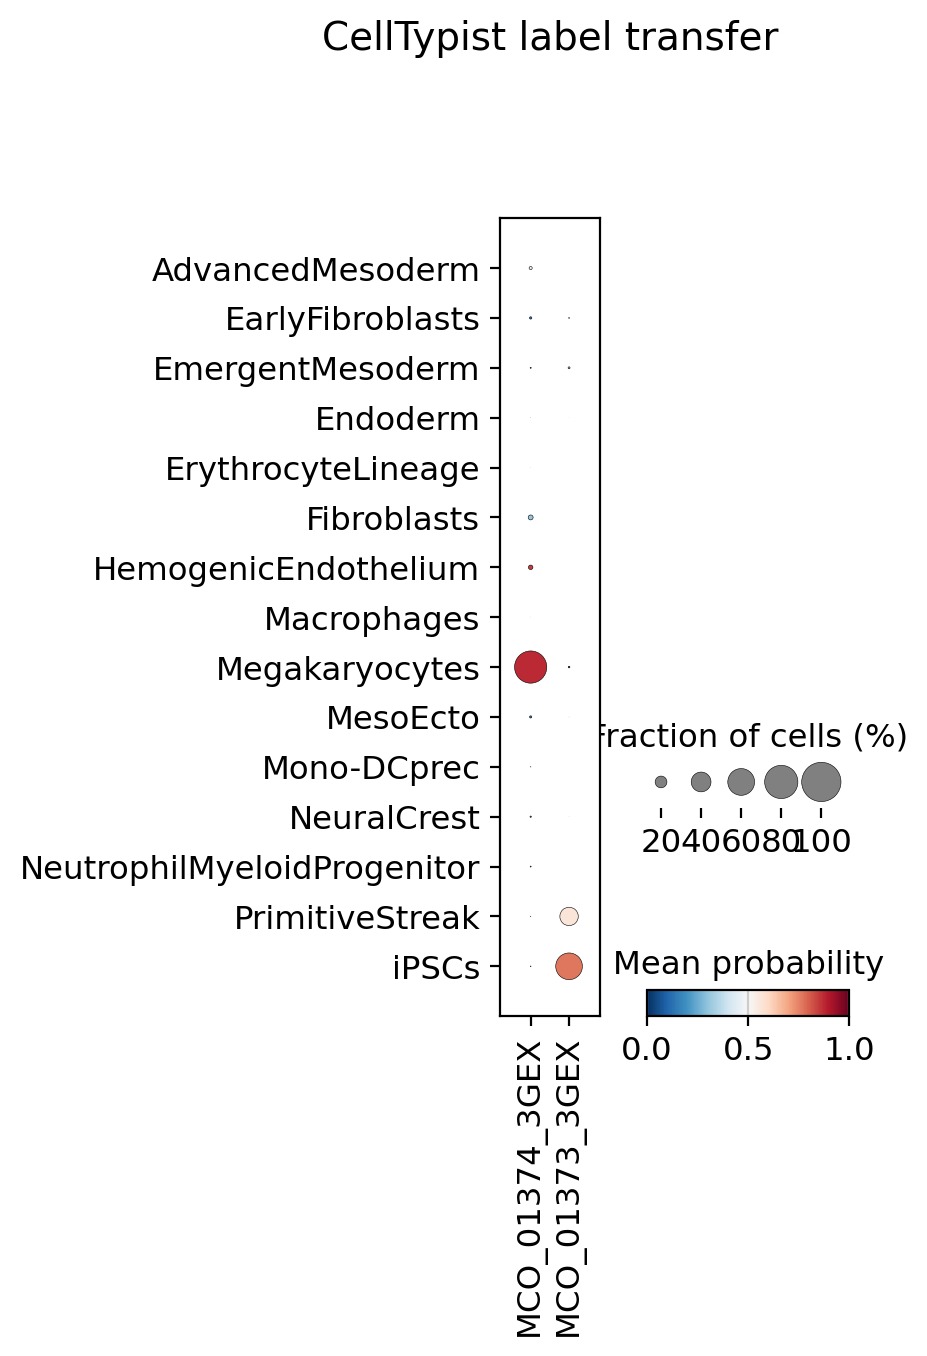

In [37]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_Alsinet.pdf')

### save results

In [38]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist//Alsinet_celltypist_prediction.csv')

# import model f_BMA

In [39]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_from_BMA.pkl')

In [40]:
new_model

CellTypist model with 64 cell types and 6071 features
    date: 2024-04-09 21:20:12.035942
    cell types: CD14 monocyte, CD4 T cell, ..., tip EC
    features: SAMD11, HES4, ..., RGR

In [41]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [42]:
#celltypist.annotate??

In [43]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 35224 cells and 28997 genes
🔗 Matching reference genes in the model
🧬 5564 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [44]:
adata = predictions.to_adata()

In [45]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,
MCO_01373_3GEX_AAACCAAAGTAGACTT-1,MCO_01373_3GEX,1305.0,507,2539.0,1356,0.000000,singlet,0.062500,0.123643,1.545689e-36,Diff_MK_non_competition,9001.0,2467,3,8,8,2588.328561,pre pro B progenitor,0.853833
MCO_01373_3GEX_AAACCAAAGTCATCGA-1,MCO_01373_3GEX,10226.0,4006,10319.0,4006,3.980051,singlet,0.196297,0.359109,8.665537e-03,Diff_MK_non_competition,10296.0,4006,5,2,2,4078.548695,MEP,0.999997


### visualize celltypist predictions

In [46]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
MEP                        8854
late erythroid             4656
pre pro B progenitor       4122
early MK                   3255
myelocyte                  2909
early erythroid            2315
DC3                        1719
osteoblast precursor       1304
neutrophil                  951
ELP                         626
GMP                         584
osteochondral precursor     557
tip EC                      547
monocytoid macrophage       368
DC precursor                327
DC2                         313
sinusoidal EC               261
pre B progenitor            179
MOP                         166
CMP                         159
eosinophil                  151
naive B cell                125
MK                          114
promyelocyte                114
schwann cells               113
CD14 monocyte               104
eo/baso/mast precursor       64
promonocyte                  48
pro B progenitor             37
osteoclast                   33
CD4 T cell             

In [47]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
MEP                         True
late erythroid              True
pre pro B progenitor        True
early MK                    True
myelocyte                   True
early erythroid             True
DC3                         True
osteoblast precursor        True
neutrophil                  True
ELP                         True
GMP                         True
osteochondral precursor     True
tip EC                      True
monocytoid macrophage       True
DC precursor                True
DC2                         True
sinusoidal EC               True
pre B progenitor            True
MOP                         True
CMP                         True
eosinophil                  True
naive B cell                True
MK                          True
promyelocyte                True
schwann cells               True
CD14 monocyte               True
eo/baso/mast precursor      True
promonocyte                False
pro B progenitor           False
osteoclast                

In [48]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
MEP                         True
late erythroid              True
pre pro B progenitor        True
early MK                    True
myelocyte                   True
early erythroid             True
DC3                         True
osteoblast precursor        True
neutrophil                  True
ELP                         True
GMP                         True
osteochondral precursor     True
tip EC                      True
monocytoid macrophage       True
DC precursor                True
DC2                         True
sinusoidal EC               True
pre B progenitor            True
MOP                         True
CMP                         True
eosinophil                  True
naive B cell                True
MK                          True
promyelocyte                True
schwann cells               True
CD14 monocyte               True
eo/baso/mast precursor     False
promonocyte                False
pro B progenitor           False
osteoclast                

In [49]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 34957 × 28997
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5', 'n_counts', 'predicted_labels', 'conf_score'
    uns: 'log1p'

In [50]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

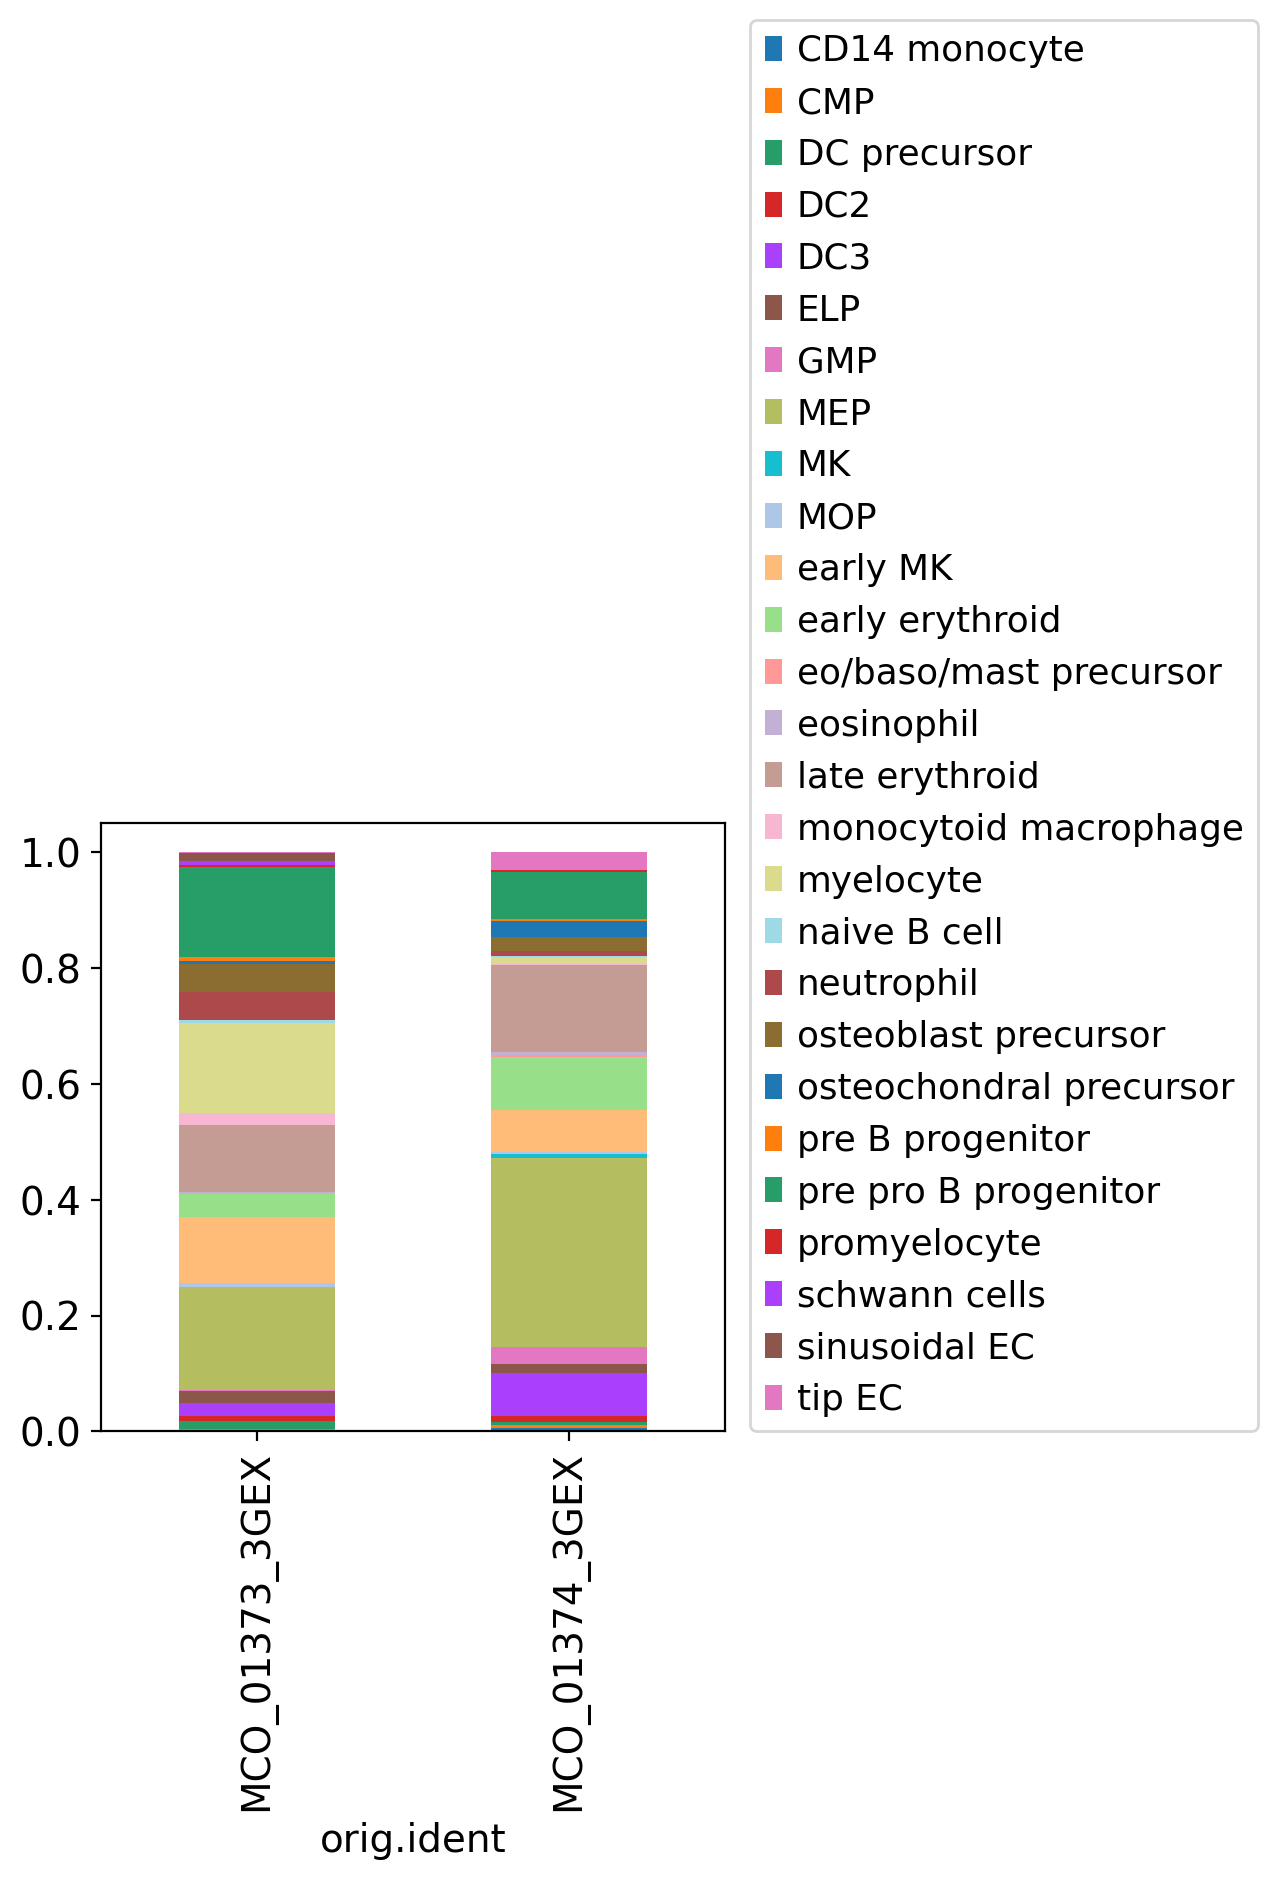

In [51]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [52]:
os.chdir("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/graphs/")

### checking confidence score

In [53]:
#celltypist.dotplot??

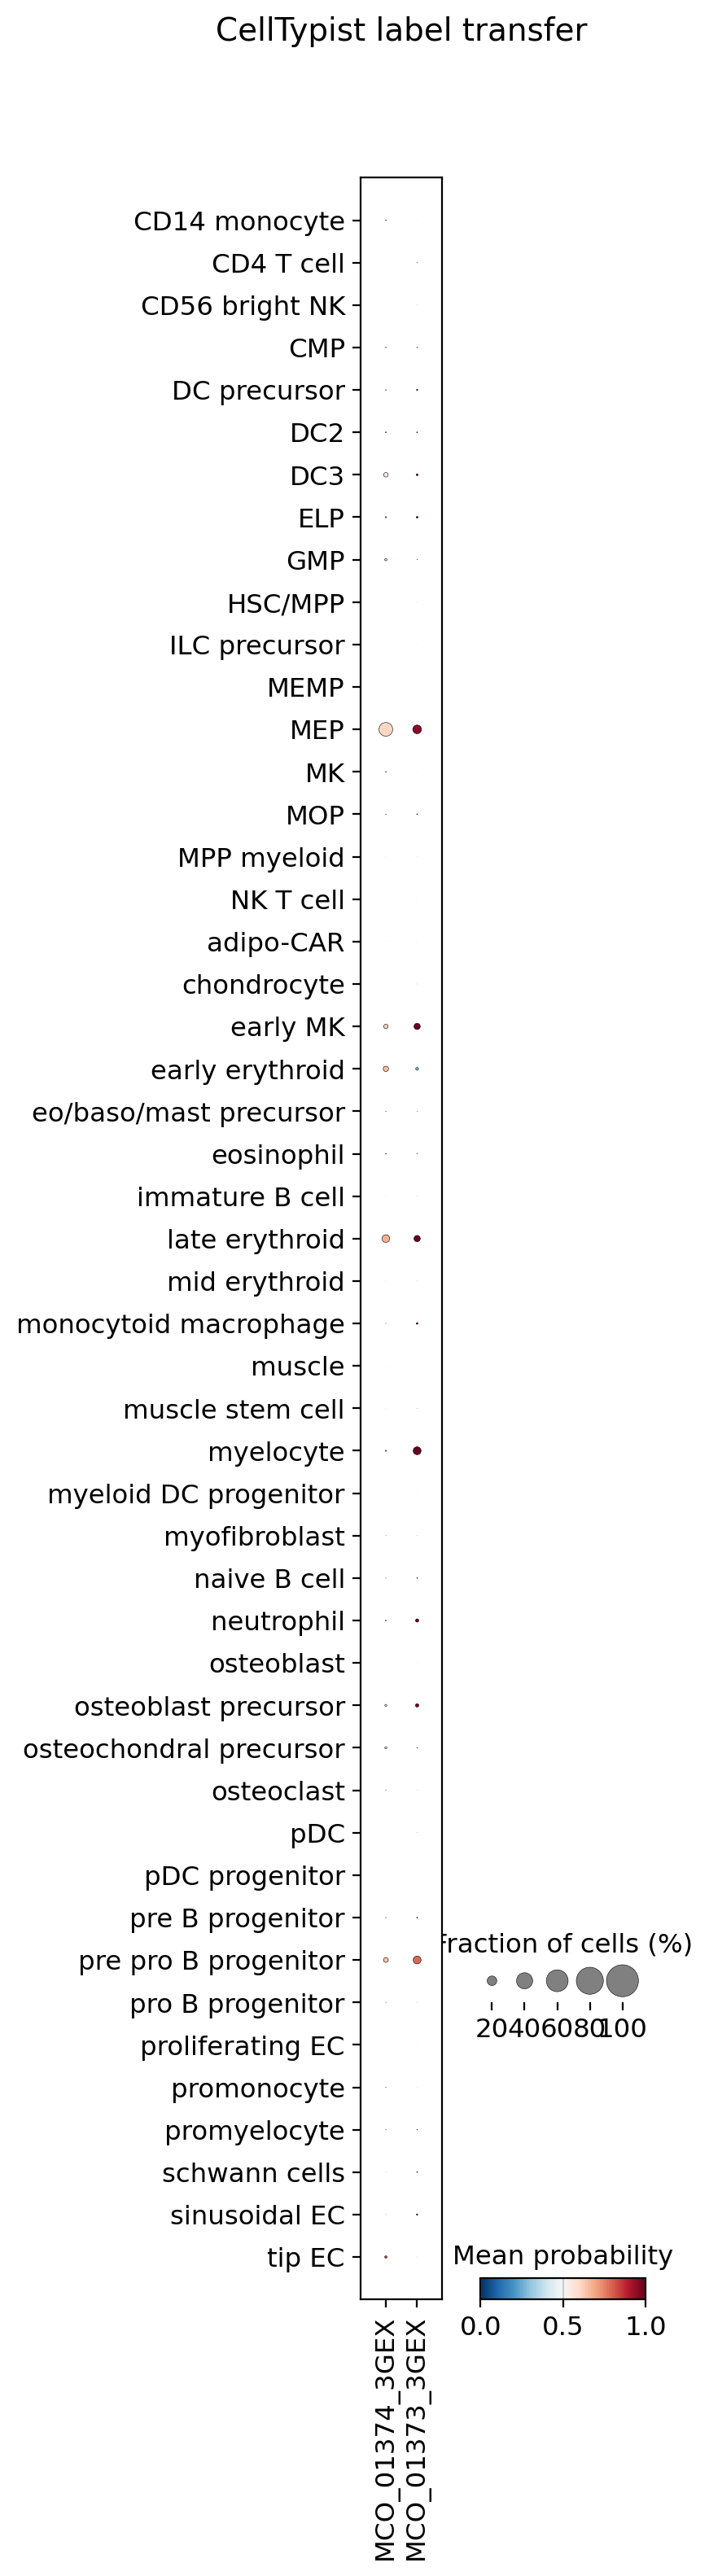

In [54]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_FBMA.pdf')

### save results

In [55]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/FBMA_celltypist_prediction.csv')

# import model Immune_All_Low

In [56]:
new_model = models.Model.load("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/Immune_All_Low.pkl")

In [57]:
new_model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [58]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [59]:
#celltypist.annotate??

In [60]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 35224 cells and 28997 genes
🔗 Matching reference genes in the model
🧬 5694 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [61]:
adata = predictions.to_adata()

In [62]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,
MCO_01373_3GEX_AAACCAAAGTAGACTT-1,MCO_01373_3GEX,1305.0,507,2539.0,1356,0.000000,singlet,0.062500,0.123643,1.545689e-36,Diff_MK_non_competition,9001.0,2467,3,8,8,2588.328561,Epithelial cells,0.196881
MCO_01373_3GEX_AAACCAAAGTCATCGA-1,MCO_01373_3GEX,10226.0,4006,10319.0,4006,3.980051,singlet,0.196297,0.359109,8.665537e-03,Diff_MK_non_competition,10296.0,4006,5,2,2,4078.548695,Epithelial cells,1.000000


### visualize celltypist predictions

In [63]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
Epithelial cells                                20513
Endothelial cells                                3182
Megakaryocyte-erythroid-mast cell progenitor     3126
Early erythroid                                  2234
Erythrocytes                                     1660
Fibroblasts                                      1387
Regulatory T cells                                435
Classical monocytes                               309
Double-positive thymocytes                        295
Plasmablasts                                      276
Intermediate macrophages                          269
Alveolar macrophages                              223
Megakaryocytes/platelets                          160
Naive B cells                                     151
HSC/MPP                                           151
Neutrophil-myeloid progenitor                     111
NK cells                                          102
ILC3                                               70
Early MK   

In [64]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
Epithelial cells                                 True
Endothelial cells                                True
Megakaryocyte-erythroid-mast cell progenitor     True
Early erythroid                                  True
Erythrocytes                                     True
Fibroblasts                                      True
Regulatory T cells                               True
Classical monocytes                              True
Double-positive thymocytes                       True
Plasmablasts                                     True
Intermediate macrophages                         True
Alveolar macrophages                             True
Megakaryocytes/platelets                         True
Naive B cells                                    True
HSC/MPP                                          True
Neutrophil-myeloid progenitor                    True
NK cells                                         True
ILC3                                             True
Early MK   

In [65]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
Epithelial cells                                 True
Endothelial cells                                True
Megakaryocyte-erythroid-mast cell progenitor     True
Early erythroid                                  True
Erythrocytes                                     True
Fibroblasts                                      True
Regulatory T cells                               True
Classical monocytes                              True
Double-positive thymocytes                       True
Plasmablasts                                     True
Intermediate macrophages                         True
Alveolar macrophages                             True
Megakaryocytes/platelets                         True
Naive B cells                                    True
HSC/MPP                                          True
Neutrophil-myeloid progenitor                    True
NK cells                                         True
ILC3                                            False
Early MK   

In [66]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 34778 × 28997
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5', 'n_counts', 'predicted_labels', 'conf_score'
    uns: 'log1p'

In [67]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

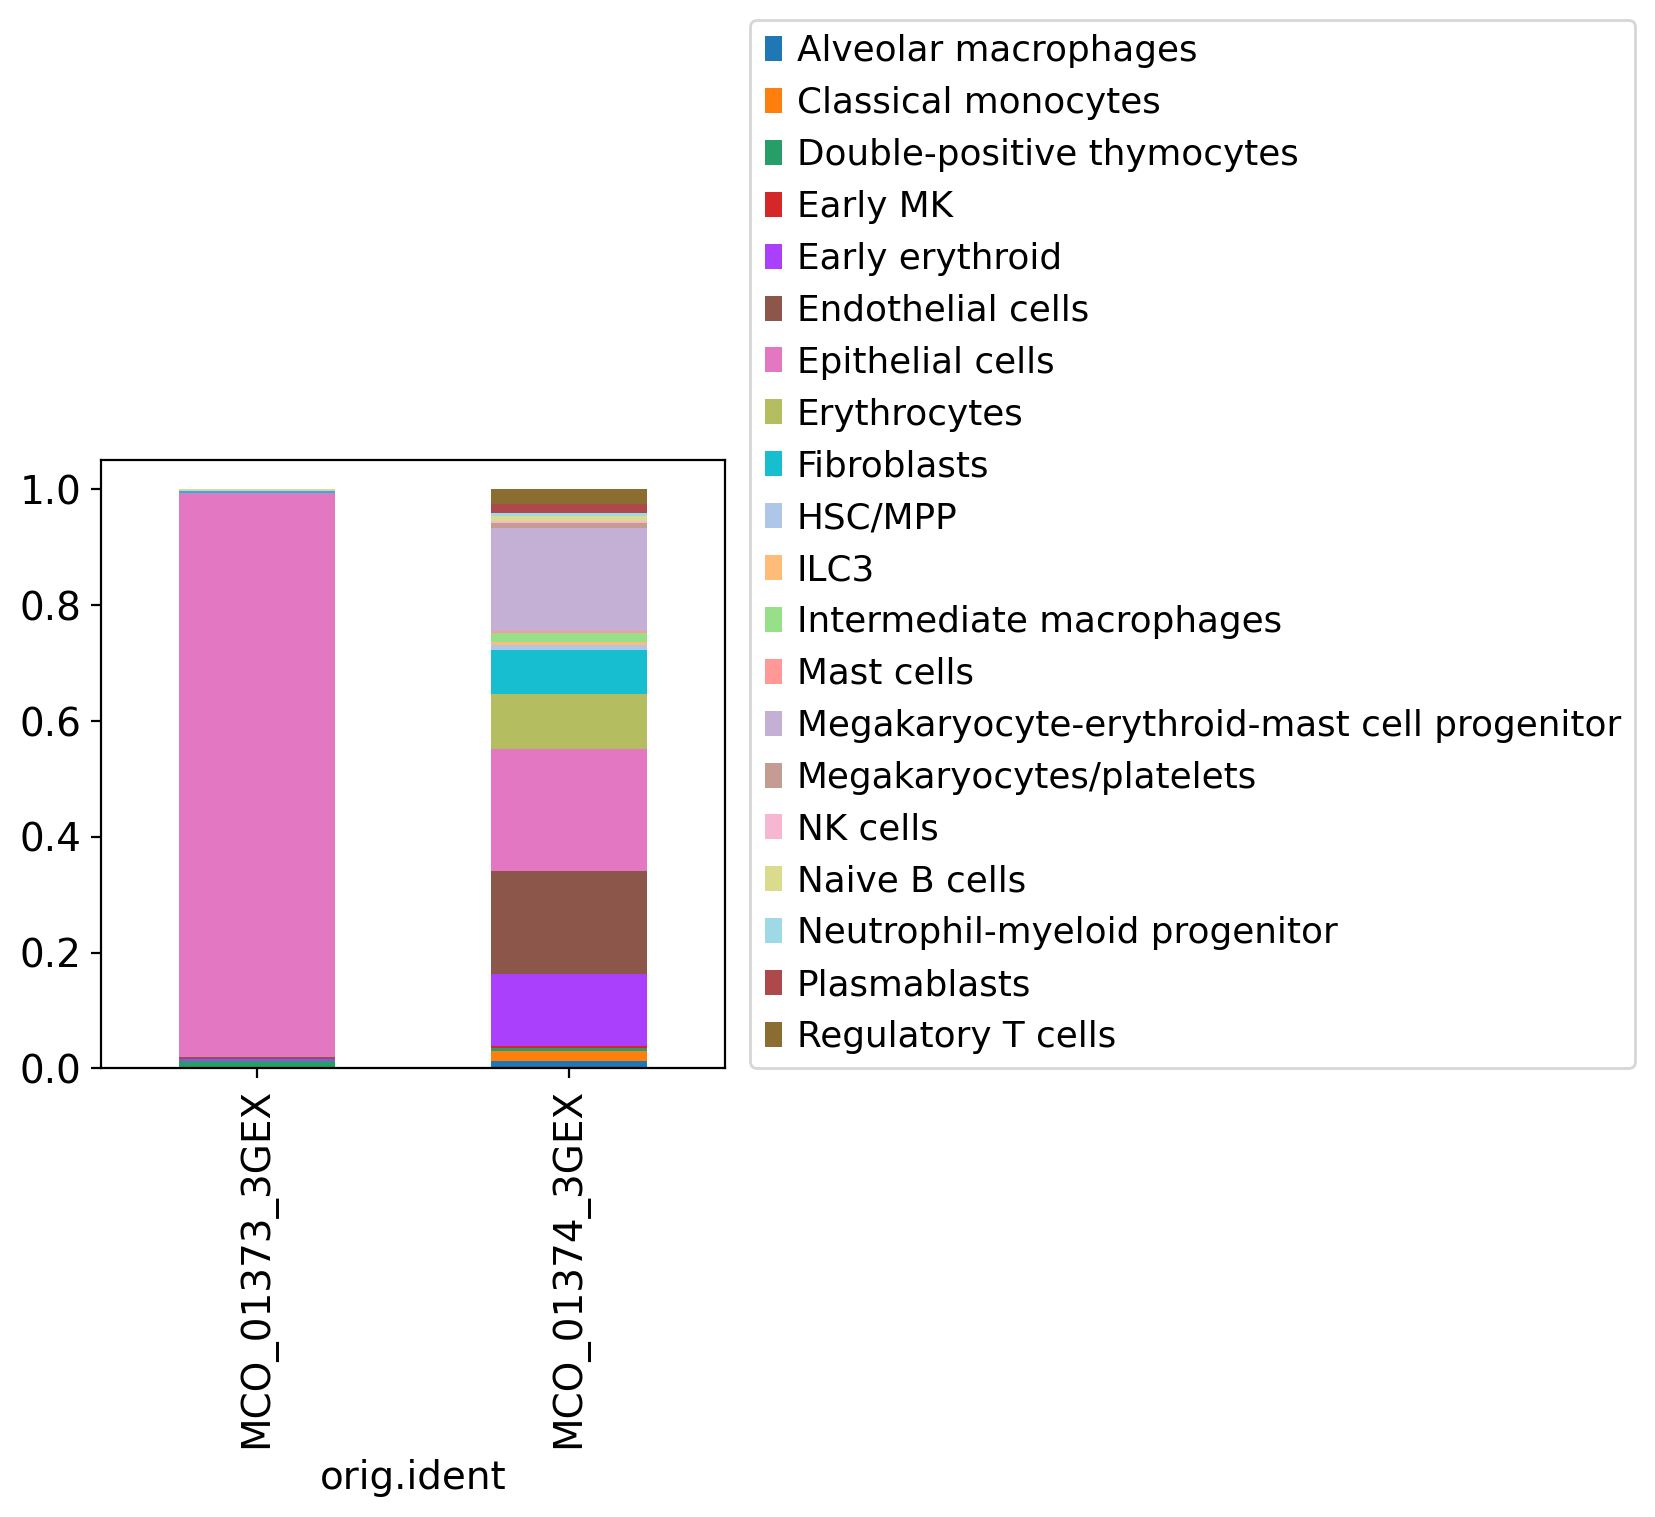

In [68]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [69]:
os.chdir("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/graphs/")

### checking confidence score

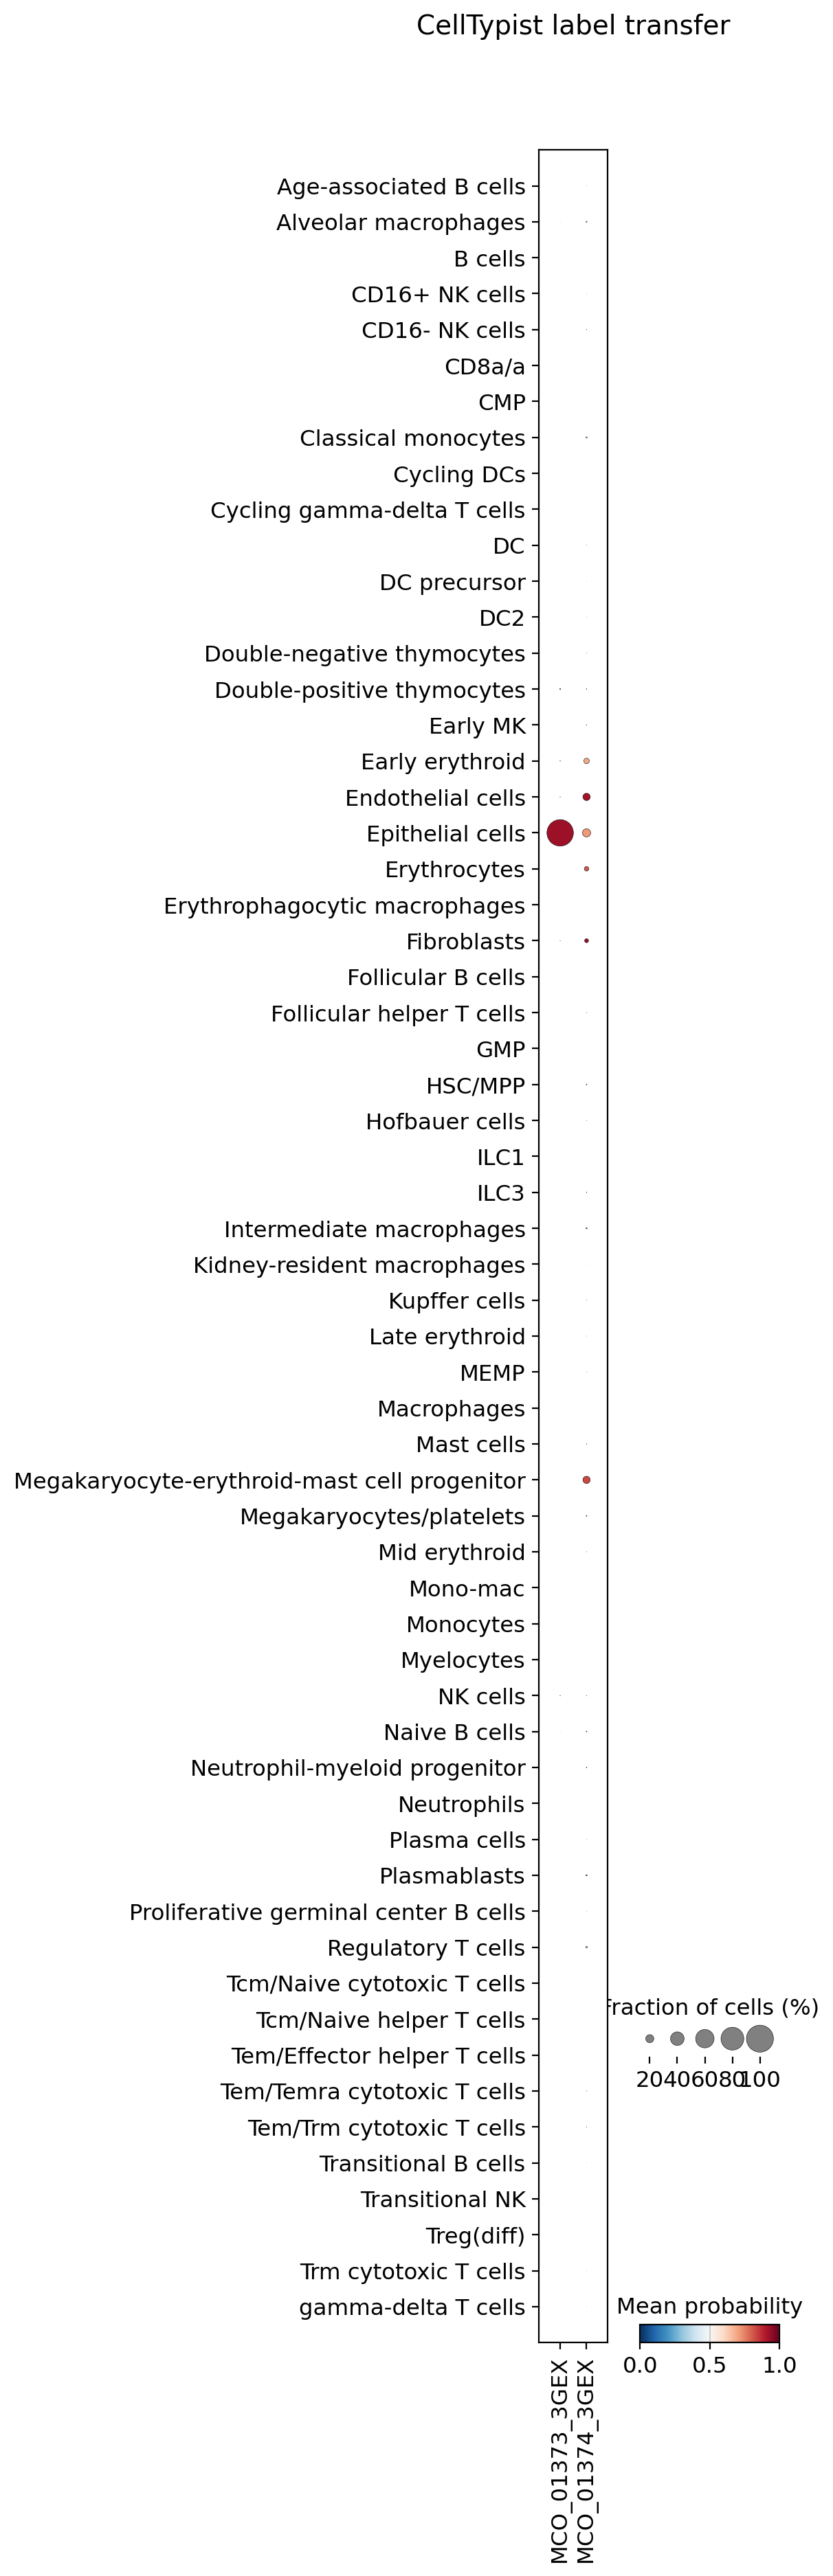

In [70]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save="Immune_ALL_low.pdf")

### save results

In [71]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/CellTypist/Immune_ALL_low_celltypist_prediction.csv')